<a href="https://colab.research.google.com/github/helenptrcia/credit-risk-using-machine-learning/blob/main/Credit_Risk_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deskripsi Dataset
Dataset ini diperoleh dari platform DQLab. Dataset ini berisi informasi terkait pengajuan kredit dari suatu lembaga keuangan. Tujuan analisis adalah membangun model machine learning untuk **memprediksi tingkat risiko kredit** berdasarkan beberapa karakteristik calon peminjam.

### Fitur-fitur:
- **kode_kontrak**: ID unik dari setiap kontrak kredit.
- **pendapatan_setahun_juta**: Total pendapatan peminjam dalam satu tahun (dalam satuan juta Rupiah).
- **kpr_aktif**: Status apakah peminjam sedang memiliki cicilan KPR (YA atau TIDAK).
- **durasi_pinjaman_bulan**: Lama pinjaman dalam bulan.
- **jumlah_tanggungan**: Jumlah orang yang menjadi tanggungan peminjam.
- **rata_rata_overdue**: Rata-rata keterlambatan pembayaran pinjaman sebelumnya (kategori: "0 - 30 days", "31 - 45 days", dll).
- **risk_rating**: Label target berupa skor risiko peminjam (1 = risiko rendah, 4 = risiko tinggi).

### Tujuan:
Memprediksi nilai `risk_rating` berdasarkan fitur-fitur lainnya menggunakan algoritma klasifikasi.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [ ]:
dataset_credit_scoring = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')
dataset_credit_scoring.head()

,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,AGR-000001,295,YA,48,5,61 - 90 days,4
1,AGR-000011,271,YA,36,5,61 - 90 days,4
2,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,AGR-000043,210,YA,12,3,46 - 60 days,3
4,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
dataset_credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   kode_kontrak             900 non-null    object
 1   pendapatan_setahun_juta  900 non-null    int64 
 2   kpr_aktif                900 non-null    object
 3   durasi_pinjaman_bulan    900 non-null    int64 
 4   jumlah_tanggungan        900 non-null    int64 
 5   rata_rata_overdue        900 non-null    object
 6   risk_rating              900 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 49.3+ KB


In [ ]:
dataset_credit_scoring.describe(include='all')

,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
count,900,900.000000,900,900.000000,900.000000,900,900.000000
unique,900,NaN,2,NaN,NaN,5,NaN
top,AGR-010790,NaN,YA,NaN,NaN,46 - 60 days,NaN
freq,1,NaN,513,NaN,NaN,291,NaN
mean,NaN,163.318889,NaN,29.933333,2.932222,NaN,2.681111
std,NaN,51.863210,NaN,13.671988,2.007457,NaN,1.294928
min,NaN,70.000000,NaN,12.000000,0.000000,NaN,1.000000
25%,NaN,121.000000,NaN,12.000000,1.000000,NaN,1.000000
50%,NaN,162.000000,NaN,24.000000,3.000000,NaN,3.000000
75%,NaN,199.000000,NaN,48.000000,5.000000,NaN,3.000000


In [ ]:
dataset_credit_scoring.isnull().sum()

,0
kode_kontrak,0
pendapatan_setahun_juta,0
kpr_aktif,0
durasi_pinjaman_bulan,0
jumlah_tanggungan,0
rata_rata_overdue,0
risk_rating,0


Berdasarkan hasil ringkasan statistik di atas, terlihat bahwa kolom `kode_kontrak` memiliki 900 nilai unik, yang berarti setiap baris data memiliki ID yang berbeda. Karena kolom ini tidak memiliki nilai prediktif, maka tidak akan digunakan dalam proses modeling. Sementara itu, kolom `kpr_aktif` berisi data kategorikal dengan dua nilai yaitu "YA" dan "TIDAK", yang akan dikonversi menjadi nilai numerik agar dapat digunakan oleh algoritma machine learning. Hal yang sama juga berlaku untuk kolom `rata_rata_overdue`, yang memiliki lima kategori keterlambatan dan akan diubah ke bentuk numerik berdasarkan urutan tingkat keterlambatan.

Dari sisi kelengkapan data, tidak ditemukan adanya nilai kosong (missing value) pada dataset ini, sehingga tidak diperlukan proses imputasi atau pembersihan lebih lanjut. Kolom-kolom numerik seperti `pendapatan_setahun_juta`, `durasi_pinjaman_bulan`, `jumlah_tanggungan`, dan `risk_rating` memiliki sebaran nilai yang cukup wajar, dan akan digunakan langsung dalam proses analisis dan modeling selanjutnya.


# Data Preparation

Membuat Dataset

In [ ]:
dataset = dataset_credit_scoring[['pendapatan_setahun_juta', 'kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan', 'rata_rata_overdue', 'risk_rating']]
dataset.head()

,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,295,YA,48,5,61 - 90 days,4
1,271,YA,36,5,61 - 90 days,4
2,159,TIDAK,12,0,0 - 30 days,1
3,210,YA,12,3,46 - 60 days,3
4,165,TIDAK,36,0,31 - 45 days,2


Mengubah data kpr_aktif menjadi tipe integer: 'YA' = 1 dan 'TIDAK' = 0


In [ ]:
#Mengubah data kpr_aktif menjadi tipe integer: 'YA' = 1 dan 'TIDAK' = 0
dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])
print('Data kpr_aktif setelah diubah:')
print(dataset['kpr_aktif'].value_counts())

Data kpr_aktif setelah diubah:
kpr_aktif
1    513
0    387
Name: count, dtype: int64


Memeriksa nilai unik pada kolom rata_rata_overdue

In [ ]:
print("Nilai unik pada kolom rata_rata_overdue")
print(dataset['rata_rata_overdue'].value_counts(), '\n')

Nilai unik pada kolom rata_rata_overdue
rata_rata_overdue
46 - 60 days    291
0 - 30 days     227
31 - 45 days    159
61 - 90 days    120
> 90 days       103
Name: count, dtype: int64 



Mengubah data rata_rata_overdue menjadi numerik

In [ ]:
mapping_dict = {
	"rata_rata_overdue": {
		"46 - 60 days": 60,
		"0 - 30 days": 30,
		"31 - 45 days": 45,
		"61 - 90 days": 90,
		"> 90 days": 91
	}
}

In [ ]:
dataset = dataset.replace(mapping_dict)
print("\nNilai unik pada kolom rata_rata_overdue setelah dikonversi menjadi numerik")
print(dataset['rata_rata_overdue'].value_counts())


Nilai unik pada kolom rata_rata_overdue setelah dikonversi menjadi numerik
rata_rata_overdue
60    291
30    227
45    159
90    120
91    103
Name: count, dtype: int64


Menampilkan dataset dengan kolom yang sudah diubah

In [ ]:
print(dataset.head())

   pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0                      295          1                     48   
1                      271          1                     36   
2                      159          0                     12   
3                      210          1                     12   
4                      165          0                     36   

   jumlah_tanggungan  rata_rata_overdue  risk_rating  
0                  5                 90            4  
1                  5                 90            4  
2                  0                 30            1  
3                  3                 60            3  
4                  0                 45            2  


# Menentukan Korelasi dengan Pearson Correlation

Membangun heatmap dan menampilkan nilai korelasi tiap variabel kedalam bentuk heatmap

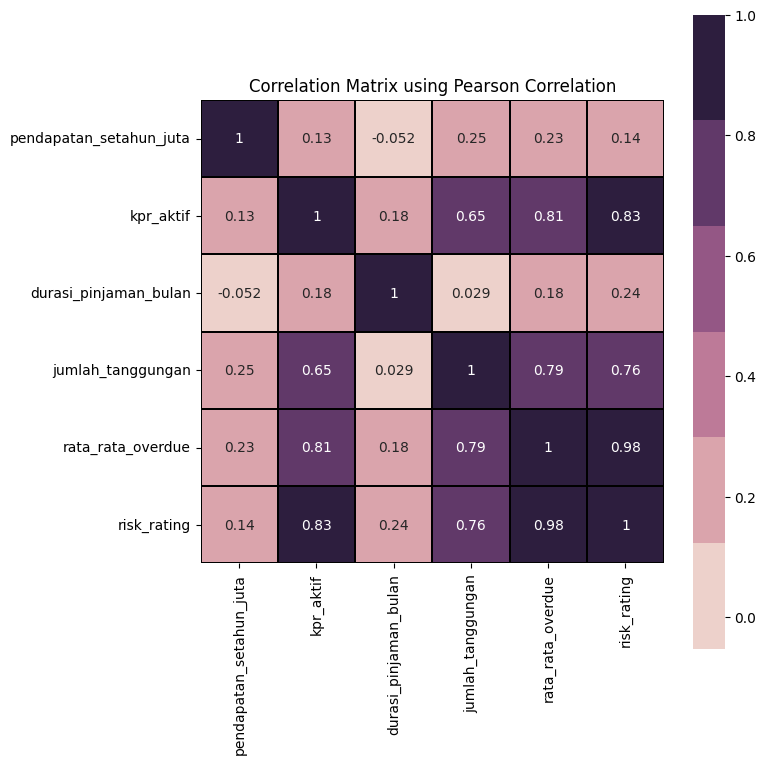

In [ ]:
plt.subplots(figsize = (8,8))
plt.title('Correlation Matrix using Pearson Correlation')
sns.heatmap(dataset.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, linecolor='black', annot=True, cmap=sns.cubehelix_palette())
plt.tight_layout()
plt.show()

Heatmap di atas menunjukkan korelasi antar fitur numerik dalam dataset menggunakan Pearson correlation. Terlihat bahwa fitur `risk_rating` memiliki korelasi yang sangat tinggi dengan `rata_rata_overdue` (0.98), yang menunjukkan bahwa semakin besar keterlambatan pembayaran sebelumnya, maka semakin tinggi pula risiko kredit yang dimiliki peminjam.

Selain itu, `risk_rating` juga memiliki korelasi yang cukup kuat dengan `kpr_aktif` (0.83) dan `jumlah_tanggungan` (0.76), yang menandakan bahwa peminjam dengan cicilan rumah aktif dan tanggungan lebih banyak cenderung memiliki risiko lebih tinggi.

Sebaliknya, fitur `pendapatan_setahun_juta` dan `durasi_pinjaman_bulan` memiliki korelasi yang sangat rendah terhadap `risk_rating`, masing-masing hanya sebesar 0.14 dan 0.24. Karena kontribusinya kecil terhadap target, kedua fitur ini akan dihapus dari dataset sebelum dilakukan pemodelan machine learning.


Menghapus Kolom dengan Korelasi Rendah

In [ ]:
dataset = dataset.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan'], axis=1)
print(dataset.head())

   kpr_aktif  jumlah_tanggungan  rata_rata_overdue  risk_rating
0          1                  5                 90            4
1          1                  5                 90            4
2          0                  0                 30            1
3          1                  3                 60            3
4          0                  0                 45            2


# Tahap Modelling dengan Algoritma Machine Learning

## Naive Bayes

Naive Bayes adalah algoritma klasifikasi dalam machine learning yang didasarkan pada Teorema Bayes. Algoritma ini terkenal karena kesederhanaannya dan kemampuannya untuk bekerja dengan baik pada dataset yang besar, meskipun mengasumsikan independensi fitur antar variabel.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Menentukan variabel x (variabel input) dan y (variabel target/label)

In [ ]:
x = dataset.drop('risk_rating', axis=1)
y = dataset['risk_rating'].astype('category')

Splitting data train 80% test 20%


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Menjalankan data training

In [ ]:
model_nb = GaussianNB()
model_nb.fit(x_train,  y_train)

GaussianNB()

Menjalankan data testing

In [ ]:
y_predict = model_nb.predict(x_test)
print(y_predict)

[2 1 3 2 4 4 1 3 3 5 1 2 5 2 3 3 1 3 3 4 2 3 3 1 5 3 3 3 3 3 2 3 5 3 1 4 4
 4 4 2 4 1 1 2 5 3 5 2 1 1 2 5 1 1 2 5 1 3 3 3 4 2 3 5 5 3 3 3 4 1 5 4 2 1
 1 4 3 3 3 5 1 2 3 2 4 3 1 3 2 1 2 3 2 2 3 1 2 5 5 1 1 1 3 1 5 4 3 5 2 2 3
 3 1 1 2 1 4 4 2 2 5 4 3 1 4 1 3 1 1 5 1 1 1 3 3 2 5 3 1 4 3 5 3 5 2 3 1 2
 2 3 3 3 3 4 5 3 3 4 3 1 2 1 1 1 2 1 3 1 4 2 1 1 4 2 2 1 1 1 3 3]


Menampilkan akurasi model

In [ ]:
print(accuracy_score(y_test, y_predict))

1.0


Melakukan evaluasi model dengan confusion matrix

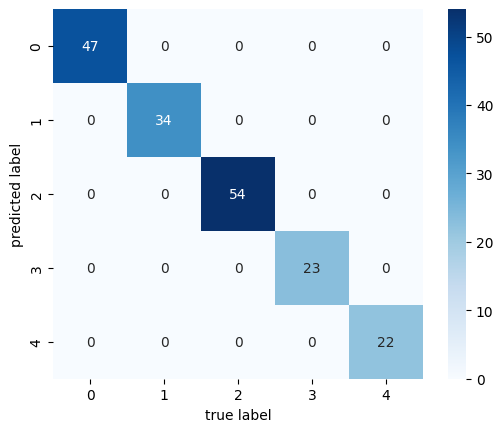

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Model Naive Bayes menghasilkan akurasi sebesar **100%** pada data uji, dengan semua prediksi yang sepenuhnya sesuai dengan nilai label sebenarnya. Confusion matrix menunjukkan bahwa tidak ada kesalahan klasifikasi di antara kelima kelas `risk_rating`.


## K-Nearest Neighbor (KNN)

K-Nearest Neighbor (KNN) adalah sebuah metode dalam machine learning, khususnya dalam supervised learning, yang digunakan untuk mengklasifikasikan data baru berdasarkan jarak terdekatnya ke data pelatihan yang sudah ada.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Menentukan variabel x (variabel input) dan y (variabel target/label)

In [ ]:
x = dataset.drop('risk_rating', axis=1)
y = dataset['risk_rating'].astype('category')

Splitting data train 80% test 20%


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Membuat Objek model_knn


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

Menjalankan data testing

In [ ]:
y_predict = model_knn.predict(x_test)
print(y_predict)

[2 1 3 2 4 4 1 3 3 5 1 2 5 2 3 3 1 3 3 4 2 3 3 1 5 3 3 3 3 3 2 3 5 3 1 4 4
 4 4 2 4 1 1 2 5 3 5 2 1 1 2 5 1 1 2 5 1 3 3 3 4 2 3 5 5 3 3 3 4 1 5 4 2 1
 1 4 3 3 3 5 1 2 3 2 4 3 1 3 2 1 2 3 2 2 3 1 2 5 5 1 1 1 3 1 5 4 3 5 2 2 3
 3 1 1 2 1 4 4 2 2 5 4 3 1 4 1 3 1 1 5 1 1 1 3 3 2 5 3 1 4 3 5 3 5 2 3 1 2
 2 3 3 3 3 4 5 3 3 4 3 1 2 1 1 1 2 1 3 1 4 2 1 1 4 2 2 1 1 1 3 3]


Menampilkan akurasi model

In [ ]:
print(accuracy_score(y_test, y_predict))

1.0


Melakukan evaluasi model dengan confusion matrix

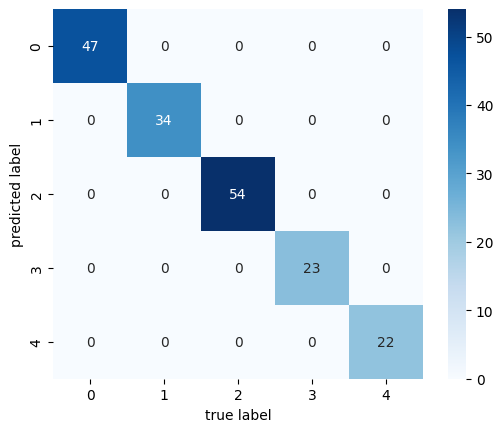

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Model KNN menunjukkan performa yang sangat baik dengan **akurasi 100%** pada data uji. Hal ini diperkuat oleh confusion matrix yang memperlihatkan bahwa seluruh nilai prediksi sesuai dengan nilai sebenarnya pada kelima kelas `risk_rating`.

## Logistic regression

Logistic Regression adalah metode statistik yang digunakan untuk memodelkan hubungan antara variabel dependen yang bersifat kategoris (biasanya biner, yaitu hanya memiliki dua kategori) dengan satu atau lebih variabel independen.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Menentukan variabel x (variabel input) dan y (variabel target/label)

In [ ]:
x = dataset.drop('risk_rating', axis=1)
y = dataset['risk_rating'].astype('category')

Splitting data train 80% test 20%


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Membuat Objek model_lr


In [ ]:
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

Menjalankan data testing

In [ ]:
y_predict = model_lr.predict(x_test)
print(y_predict)

[2 1 3 2 4 4 1 3 3 4 1 2 4 2 3 3 1 3 3 4 2 3 3 1 4 2 3 3 3 3 2 3 4 3 1 4 4
 4 4 2 4 1 1 2 4 3 4 2 1 1 2 4 1 1 2 4 1 3 3 3 4 2 3 4 2 3 3 3 4 1 4 4 2 1
 1 4 3 3 3 4 1 2 3 2 4 3 1 3 2 1 2 3 2 2 3 1 2 4 4 1 1 1 3 1 4 4 3 4 2 2 3
 3 1 1 2 1 4 4 2 2 4 4 3 1 4 1 3 1 1 4 1 1 1 3 3 2 4 3 1 4 3 4 3 4 2 3 1 2
 2 3 3 3 3 4 4 3 3 4 3 1 2 1 1 1 2 1 3 1 4 2 1 1 4 2 2 1 1 1 3 3]


Menampilkan akurasi model

In [ ]:
print(accuracy_score(y_test, y_predict))

0.8722222222222222


Melakukan evaluasi model dengan confusion matrix

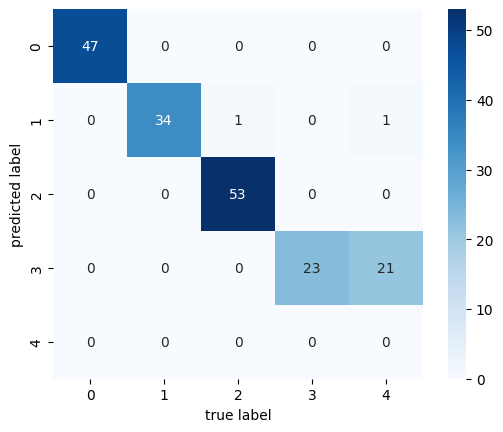

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Model Logistic Regression menghasilkan akurasi sebesar **87.22%**, dengan sebagian besar prediksi tepat. Dari confusion matrix terlihat bahwa model kesulitan membedakan antara kelas 3 dan 4, di mana seluruh instance dari kelas 4 justru diklasifikasikan sebagai kelas 3. Hal ini mungkin disebabkan oleh kemiripan pola fitur di antara kedua kelas tersebut, atau karena jumlah data di kelas 4 yang lebih sedikit dibanding kelas lain.


## Support Vector Machine

Support Vector Machine (SVM) adalah algoritma machine learning yang diawasi (supervised learning) yang digunakan untuk klasifikasi dan regresi. SVM bekerja dengan cara mencari hyperplane terbaik yang memisahkan dua kelas data dengan margin (jarak) maksimal.

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Menentukan variabel x (variabel input) dan y (variabel target/label)

In [ ]:
x = dataset.drop('risk_rating', axis=1)
y = dataset['risk_rating'].astype('category')

Splitting data train 80% test 20%


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Membuat Objek model_svm


In [ ]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train, y_train)

SVC(kernel='linear')

Menjalankan data testing

In [ ]:
y_predict = model_svm.predict(x_test)
print(y_predict)

[2 1 3 2 4 4 1 3 3 5 1 2 5 2 3 3 1 3 3 4 2 3 3 1 5 3 3 3 3 3 2 3 5 3 1 4 4
 4 4 2 4 1 1 2 5 3 5 2 1 1 2 5 1 1 2 5 1 3 3 3 4 2 3 5 5 3 3 3 4 1 5 4 2 1
 1 4 3 3 3 5 1 2 3 2 4 3 1 3 2 1 2 3 2 2 3 1 2 5 5 1 1 1 3 1 5 4 3 5 2 2 3
 3 1 1 2 1 4 4 2 2 5 4 3 1 4 1 3 1 1 5 1 1 1 3 3 2 5 3 1 4 3 5 3 5 2 3 1 2
 2 3 3 3 3 4 5 3 3 4 3 1 2 1 1 1 2 1 3 1 4 2 1 1 4 2 2 1 1 1 3 3]


Menampilkan akurasi model

In [ ]:
print(accuracy_score(y_test, y_predict))

1.0


Melakukan evaluasi model dengan confusion matrix

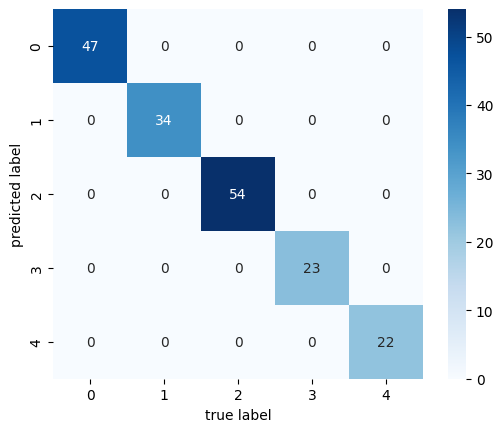

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Model Support Vector Machine (SVM) menghasilkan akurasi sempurna (100%) pada data uji. Sama seperti Naive Bayes dan KNN, SVM berhasil mengklasifikasikan seluruh data uji ke dalam kelas risk_rating dengan benar, tanpa ada kesalahan prediksi pada confusion matrix.

## Kesimpulan Proyek

### 📊 Kesimpulan Analisis Data

Berdasarkan eksplorasi awal terhadap dataset pengajuan kredit, ditemukan beberapa pola penting:

- Fitur `rata_rata_overdue` memiliki korelasi yang sangat kuat terhadap `risk_rating` (0.98). Ini menunjukkan bahwa keterlambatan pembayaran adalah indikator paling kuat dalam menentukan risiko kredit seorang peminjam.
- Fitur lain seperti `kpr_aktif` dan `jumlah_tanggungan` juga menunjukkan korelasi tinggi terhadap risiko, yang berarti semakin banyak tanggungan dan jika peminjam memiliki cicilan rumah aktif, maka risikonya cenderung meningkat.
- Sebaliknya, `pendapatan_setahun_juta` dan `durasi_pinjaman_bulan` memiliki pengaruh sangat rendah terhadap nilai risiko, sehingga dapat dipertimbangkan untuk tidak dijadikan fitur utama dalam pemodelan.

### 🤖 Kesimpulan Modeling

Empat algoritma machine learning telah digunakan untuk memprediksi `risk_rating`:

| Model                  | Akurasi |
|------------------------|---------|
| **Naive Bayes**        | 1.00    |
| **K-Nearest Neighbors**| 1.00    |
| **Support Vector Machine (SVM)**| 1.00 |
| **Logistic Regression**| 0.8722  |

Meskipun beberapa model menunjukkan akurasi yang sempurna, hasil tersebut perlu dikritisi lebih lanjut. Hal ini bisa saja disebabkan oleh struktur data yang terlalu bersih, keberadaan fitur yang terlalu dominan, atau bahkan kemungkinan data leakage.

Untuk memastikan bahwa performa model tidak hanya cocok pada satu pembagian data tertentu, sebaiknya dilakukan K-Fold Cross Validation. Teknik ini akan membantu mengukur seberapa konsisten akurasi model di berbagai subset data yang berbeda, sehingga memberikan gambaran yang lebih valid terhadap kemampuan generalisasi model.

### 📌 Saran untuk Penanganan Risiko Kredit

Berdasarkan pola data dan hasil modeling, berikut beberapa saran yang dapat diambil untuk mendukung proses manajemen risiko kredit:

1. **Fokus pada Riwayat Keterlambatan**  
   Perusahaan sebaiknya menjadikan `rata_rata_overdue` sebagai fitur utama dalam penilaian risiko. Peminjam dengan catatan keterlambatan ≥ 31 hari sebaiknya diberikan perhatian khusus atau syarat tambahan.

2. **Tinjau Rasio Tanggungan dan Cicilan**  
   Jumlah tanggungan yang tinggi dikombinasikan dengan status `kpr_aktif` menunjukkan peningkatan risiko. Disarankan untuk menghitung rasio beban keluarga terhadap penghasilan sebelum menyetujui kredit.

3. **Implementasi Model Prediktif di Sistem Skoring Kredit**  
   Model prediksi seperti KNN atau SVM dapat dijadikan komponen pendukung sistem pengambilan keputusan kredit, terutama dalam tahap screening awal. Namun, perlu ditambahkan proses interpretasi atau explainability untuk mendukung keputusan yang transparan.

4. **Kembangkan Sistem Peringatan Dini**  
   Gunakan skor risiko yang dihasilkan model untuk memantau nasabah eksisting. Peminjam yang mengalami perubahan skor signifikan dalam waktu singkat bisa ditindaklanjuti untuk penyesuaian batas kredit atau komunikasi proaktif.

---

### 🎯 Penutup

Proyek ini menunjukkan bagaimana machine learning dapat membantu dalam mengelola risiko kredit dengan memanfaatkan pola historis dari data peminjam. Dengan implementasi yang hati-hati dan evaluasi berkelanjutan, model ini dapat menjadi alat pendukung keputusan yang efektif bagi institusi keuangan.
